In [10]:
##########################################################################################################################################################
## File:         AX18210_Homework3.ipynb
## Author:       Syed Husain
## Date:         5/2/2023
## E-mail:       ax18210@umbc.edu
## Desciption: The file plot different types of multi armed bandit problems
## Course/Section : CMSC 471
##############################################################################################################################################

import numpy as np
import matplotlib.pyplot as plt

#Code for Question 3
class GreedyBandit: 
    def __init__(self, k):
        self.k = k # generate a vector of true values for each arm using a normal distribution
        self.q_true = np.random.randn(k) # identify the index of the arm with the highest true value
        self.best_action = np.argmax(self.q_true)
        self.actions = np.arange(k)
        
    def get_reward(self, action): # Get the reward for the selected action (with some random noise added)
        return np.random.normal(self.q_true[action], 1)
        
class EpsilonGreedyAgent:
    def __init__(self, k, epsilon): # Initialize the class with the number of arms available (k) and a value for epsilon
        self.k = k
        self.epsilon = epsilon
        self.Q = np.zeros(k) # Initializes the value estimates (Q) and the count of each arm pulled (N)
        self.N = np.zeros(k)
        
    def get_action(self):
        if np.random.random() < self.epsilon: # If a random value is less than epsilon, select a random action
            return np.random.choice(self.k)
        else:
            return np.argmax(self.Q) # Otherwise, select the action with the highest value estimate
        
    def update(self, action, reward):
        self.N[action] += 1 # Update the value estimate using a sample average method
        self.Q[action] += (reward - self.Q[action]) / self.N[action]

def experiment(epsilon):
    rewards = np.zeros((2000, 1000)) # Initialize arrays to store the rewards and optimal actions for each trial
    optimal_actions = np.zeros((2000, 1000))
    for i in range(2000): # Run 2000 trials of the Greedy Bandit problem with the given epsilon
        bandit = GreedyBandit(10)  # Create a new instance of the GreedyBandit and EpsilonGreedyAgent classes for each trial
        agent = EpsilonGreedyAgent(10, epsilon)
        for t in range(1000):
            # for each trial , selects an action, gets the reward and update the values 
            action = agent.get_action()
            reward = bandit.get_reward(action)
            agent.update(action, reward)
            # Store the reward and whether the selected action was optimal for each step
            rewards[i, t] = reward
            optimal_actions[i, t] = (action == bandit.best_action)
    # Calculate the average reward and percentage of optimal actions for each step across all trials
    average_rewards = np.mean(rewards, axis=0)
    optimal_percentages = np.mean(optimal_actions, axis=0) * 100
    return average_rewards, optimal_percentages

Eplison Bandit Plots

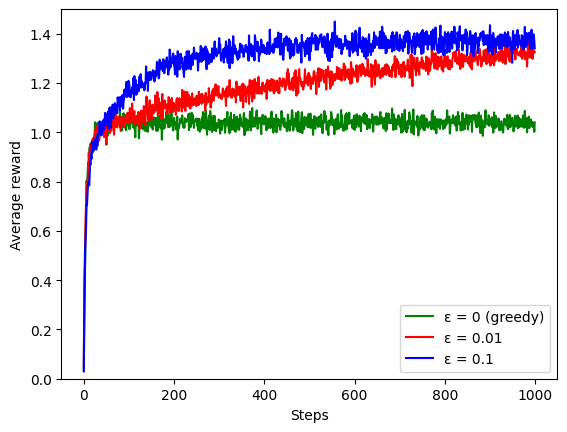

In [11]:
#3a
epsilons = [0, 0.01, 0.1]
colors = ['g', 'r', 'b']
for i in range(len(epsilons)):
    average_rewards, optimal_percentages = experiment(epsilons[i])
    if(epsilons[i] == 0):
        plt.plot(average_rewards, colors[i], label='ε = ' + str(epsilons[i]) + ' (greedy)')
    else:
        plt.plot(average_rewards, colors[i], label='ε = ' + str(epsilons[i]))
        
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.ylim((0, 1.5)) 
plt.legend()
plt.show()


The greedy method of ε = 0 initially had the highest average reward compared to others, but then it stayed constant at that rate while other methods went above it. As the greedy method didn't get to explore better optimal actions in order to recieve a higher average award, it perfomed worse in the long run than other methods. On the other hand, The ε = 0.1 method explored more, and usually found the optimal action that provides the highest reward earlier, but it never selected that action all the times and hence hit a platue at 1.4. The ε = 0.01 method improved more slowly, but eventually performed better than greedy method and would surpass epsilon = 0.1 in the future at its rate. Overall, the results show that the performance of the epsilon-greedy method improves with an increasing number of time steps. This is because the algorithm learns from its past experiences and adjusts the action values based on the rewards received.

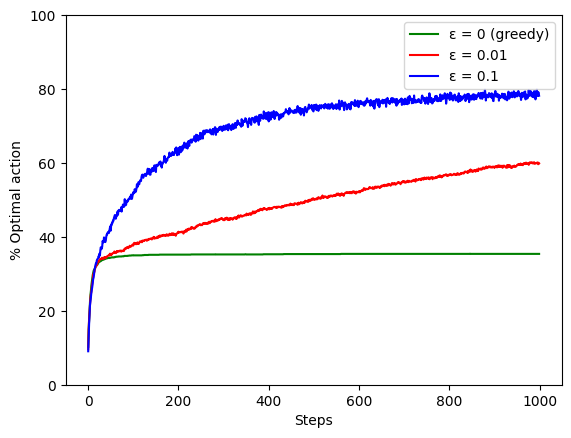

In [12]:
#3b
for i in range(len(epsilons)):
    average_rewards, optimal_percentages = experiment(epsilons[i])
    if(epsilons[i] == 0):
        plt.plot(optimal_percentages, colors[i], label='ε = ' + str(epsilons[i]) + ' (greedy)')
    else:
        plt.plot(optimal_percentages, colors[i], label='ε = ' + str(epsilons[i]))
        
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.ylim((0, 100))
plt.legend()
plt.show()

The greedy method of ε = 0 initially took better optimal actions than the others, but then leveled off at a lower suboptimal action than the other methods. As the greedy method didn't get to explore better optimal actions it constantly perfomed a constant suboptimal action. On the other hand, The ε = 0.1 method explored more, and usually found the optimal action earlier, but it never selected that action majority of the time. The ε = 0.01 method improved more slowly, but eventually performed the best optimal actions in comparison to other methods. Overall,we find that when epsilon is set to a high value, the algorithm explores more and tends to converge to a suboptimal solution. On the other hand, when epsilon is set to a low value, the algorithm exploits more and tends to converge to a better solution, but may get stuck in a local optima. 

# 4. Optimistic Bandit 

In [13]:
class OptimisticBandit:
    def __init__(self, k):
        self.k = k # generate a vector of true values for each arm using a normal distribution
        self.q_star = np.random.normal(0, 1, k) # true value of each action
        self.action_count = np.zeros(k) # number of times each action was selected
        self.Q = np.zeros(k) + 5  # optimistic initial values for scheme 1, 0 for scheme 2
        
    def get_reward(self, action):
        return np.random.normal(self.q_star[action], 1) # reward for selecting an action
    
    def choose_action(self, epsilon):
        if np.random.rand() < epsilon:  # epsilon-greedy action selection
            return np.random.randint(self.k) # return a random action
        else:
            return np.argmax(self.Q) # return the action with the highest Q-value
    
    def update_Q(self, action, reward, alpha):
        self.action_count[action] += 1 # increment the count of the selected action
        self.Q[action] += alpha * (reward - self.Q[action]) #update the Q-value of the selected action          

def run_bandit(epsilon, alpha, initial_value, time_horizon):
    bandit = OptimisticBandit(10) # initialize a bandit object with 10 arms
    bandit.Q = np.zeros(10) + initial_value # set initial values for Q based on the scheme
    rewards = np.zeros(time_horizon)  # to store the reward obtained at each timestep
    optimal_actions = np.zeros(time_horizon) # to store if the optimal action was selected at each timestep
    optimal_action = np.argmax(bandit.q_star) # find the optimal action
    
    for t in range(time_horizon):
        #for each trial , selects an action, gets the reward and update the values 
        action = bandit.choose_action(epsilon) 
        reward = bandit.get_reward(action)
        bandit.update_Q(action, reward, alpha)
        rewards[t] = reward # store the reward obtained at each trial
        
        # check if the optimal action was selected and mark that the optimal action was selected at this timestep
        if action == optimal_action:
            optimal_actions[t] = 1
            
    return rewards, optimal_actions #return the reward and the optimal_actions

def run_experiments(epsilon, alpha, initial_value, time_horizon, num_instances):
    rewards = np.zeros((num_instances, time_horizon)) 
    optimal_actions = np.zeros((num_instances, time_horizon)) 
    
    for i in range(num_instances):
        r, oa = run_bandit(epsilon, alpha, initial_value, time_horizon) # call the run bandit to turn the trials
        rewards[i] = r # store the rewards obtained for this instance
        optimal_actions[i] = oa # store the optimal actions taken for each instance
    
    avg_rewards = np.mean(rewards, axis=0) # compute the average reward obtained at each timestep across all instances
    avg_optimal_actions = np.mean(optimal_actions, axis=0) * 100 # compute the average optimal action obtained at each timestep across all instances
    
    return avg_rewards, avg_optimal_actions #returns the average reward and optimal actions

Optimistic Plots

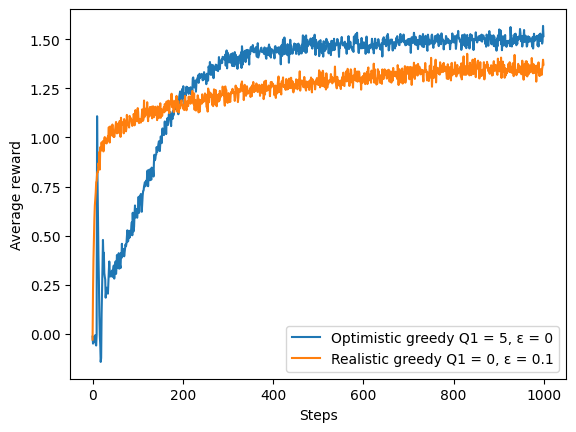

In [14]:
#4a
avg_rewards_1, avg_optimal_actions_1 = run_experiments(0, 0.1, 5, 1000, 2000) # Scheme 1: optimistic initial values
avg_rewards_2, avg_optimal_actions_2 = run_experiments(0.1, 0.1, 0, 1000, 2000) # Scheme 2: realistic initial values

plt.plot(avg_rewards_1, label='Optimistic greedy Q1 = 5, ε = 0')
plt.plot(avg_rewards_2, label='Realistic greedy Q1 = 0, ε = 0.1')
plt.xlabel('Steps')
plt.ylabel('Average reward')
plt.legend()
plt.show()


At the beginning, the optimistic method's performance was inferior to the realistic greedy as it tended to explore more. However, over time, its performance improves due to the reduction in exploration and it finding better optimal actions that provided a greater average reward. On the other hand, the realistic greedy performed better initially for the first 200 steps. However, since that it performed worse than optimistic method.  The results show that the method with optimistic initial estimates achieves a higher average reward over time than the method with realistic initial estimates. One of the reasons could be that because the optimistic initial estimates encourage exploration, as the agent initially overestimates the value of all actions, and thus has a higher chance of trying out different actions. This exploration helps the agent learn the true values of the actions, and as it becomes more certain about the true values, it exploits the most rewarding actions more frequently. Overall, the results suggest that optimistic initial estimates can be a useful strategy for encouraging exploration in reinforcement learning problems.

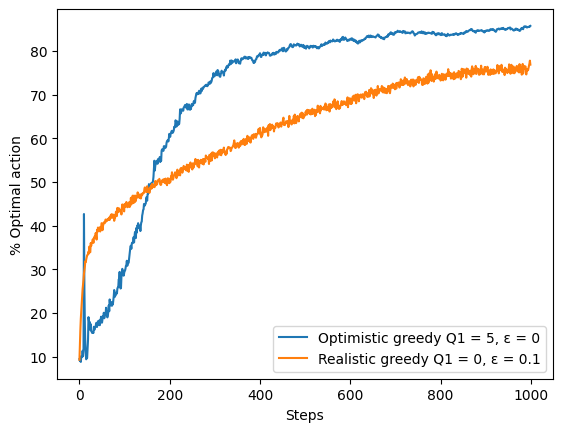

In [15]:
#4b
plt.plot(avg_optimal_actions_1, label='Optimistic greedy Q1 = 5, ε = 0')
plt.plot(avg_optimal_actions_2, label='Realistic greedy Q1 = 0, ε = 0.1')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.legend()
plt.show()

At the beginning, the optimistic method's performance was inferior to the realistic greedy as it tended to explore more. However, over time, its performance improves due to the reduction in exploration and it finding better percentage of optimal actions. On the other hand, the realistic greedy took better optimal actions initially for the first 200 steps. From the result we find that the optimistic method perform better than the realistic method. Specifically, for the optimistic method, the percentage of optimal action selection increases sharply and then gradually levels off as the number of steps increases. On the other hand, for the realistic initialization methods, the percentage of optimal action selection increases gradually and does not reach the same level as the optimistic initialization methods even after a large number of steps.

# 5. UCB Bandit

In [16]:
# Define the Bandit class
class UcbBandit:
    def __init__(self, k):
        self.k = k  # number of arms/bandits
        self.q_star = np.random.normal(0, 1, k) # q*(a) for each action 'a'
    
    def get_reward(self, action):
        return np.random.normal(self.q_star[action], 1)  # returns reward for a given action 'a'
    
# Define the epsilon-greedy algorithm
def epsilon_greedy(k, epsilon, alpha, Q1, T): 
    bandit = UcbBandit(k)
    Q = np.zeros(k) + Q1 # initial Q values, Q(a) for each action 'a'
    N = np.zeros(k) # number of times each action has been chosen
    rewards = []  # rewards obtained for each timestep
    optimal_actions = [] #optimal action for each timestep
    
    for t in range(T):
        if np.random.random() < epsilon:
            action = np.random.choice(k)  # choose a random action with probability epsilon
        else:
            action = np.argmax(Q) # choose the action with highest Q value with probability 1-epsilon
        
        reward = bandit.get_reward(action) # get reward for chosen action
        rewards.append(reward) 
        
        N[action] += 1 # increment the number of times the chosen action has been chosen
        Q[action] += alpha * (reward - Q[action]) / N[action] # update the Q value for chosen action
        
        optimal_action = np.argmax(bandit.q_star) # get the optimal action for the current bandit
        optimal_actions.append(action == optimal_action) # append whether the chosen action is optimal
    
    return np.array(rewards), np.array(optimal_actions) # return rewards and optimal actions as numpy arrays


# Define the UCB algorithm
def UCB(k, c, n_instances, T):
    Q_star = np.random.normal(size=(n_instances, k))  # Initialize the true action values randomly from a normal distribution

    # Initialize the action-value estimates and action counts to zero for all instances
    Q = np.zeros((n_instances, k))
    N = np.zeros((n_instances, k))

    # Initialize the observed reward and optimal action selection arrays to zero for all instances and time steps
    R = np.zeros((n_instances, T))
    optimal = np.zeros((n_instances, T))

    # Run the UCB algorithm for each instance and time step
    for i in range(n_instances):
        for t in range(T):
            # Select the action with the highest UCB value
            A = np.argmax(Q[i] + c * np.sqrt(np.log(t+1) / (N[i] + 1e-6)))
            
            # Generate a reward for the selected action
            R[i, t] = np.random.normal(Q_star[i, A])
            
            # Update the action-value estimate and action count for the selected action
            N[i, A] += 1
            Q[i, A] += (R[i, t] - Q[i, A]) / N[i, A]
            
            # Check if the selected action is the optimal action
            optimal[i, t] = (A == np.argmax(Q_star[i]))
    
    # Calculate the average observed reward and percentage of optimal action selection over instances and time steps
    avg_reward = np.mean(R, axis=0)
    opt_percent = 100 * np.mean(optimal, axis=0)

    return avg_reward, opt_percent


# Run the experiments
k = 10
alpha = 0.1
T = 1000
Q1 = 0
c = 2
epsilon = 0.1
n_instances = 2000

# Run epsilon-greedy algorithm
avg_rewards_eps_greedy = np.zeros(T)
optimal_actions_eps_greedy = np.zeros(T)
for i in range(n_instances):
    rewards, optimal_actions = epsilon_greedy(k, epsilon, alpha, Q1, T)
    avg_rewards_eps_greedy += (rewards - avg_rewards_eps_greedy) / (i + 1)
    optimal_actions_eps_greedy += (optimal_actions - optimal_actions_eps_greedy) / (i + 1)

 
ucb_avg_reward, ucb_opt_percent = UCB(k, c, n_instances, T)

UCB Plots

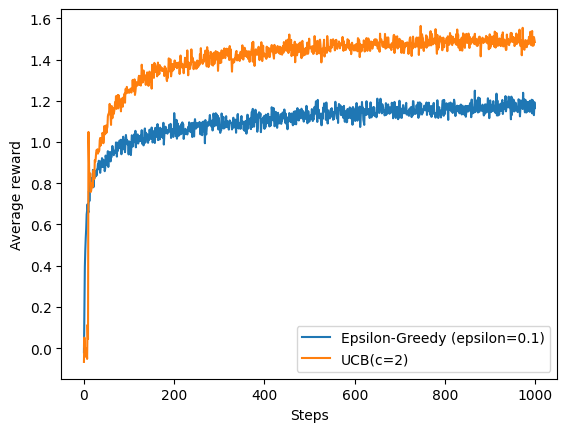

In [17]:
#5a
plt.plot(avg_rewards_eps_greedy, label="Epsilon-Greedy (epsilon=0.1)")
plt.plot(range(T), ucb_avg_reward, label="UCB(c=2)")
plt.xlabel("Steps")
plt.ylabel('Average reward')
plt.legend()
plt.show()

From the plot we find that initially UCB performs worse but eventually outperforms epsilon greedy. There is a spike in performance for UCB initially between steps 10-20. This could be due to the UCB algorithm initially exploring a set of actions that are not the optimal action, but that have high uncertainty. As a result, the algorithm may able to quickly discover that one of these sub-optimal actions has a higher reward than the current estimate of the optimal action. After the initial exploration phase, UCB starts to outperform epsilon-greedy and achieves higher average rewards in the long run. This is likely due to UCB balancing exploration and exploitation by using a confidence bound on the estimated action values to select actions, which leads to a more informed exploration of the action space.

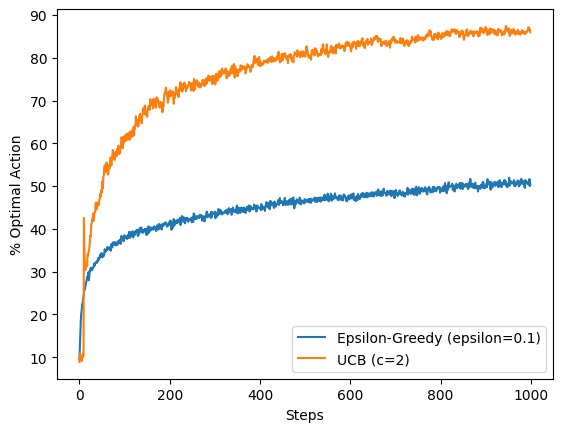

In [18]:
#5b 
plt.plot(optimal_actions_eps_greedy * 100, label="Epsilon-Greedy (epsilon=0.1)")
plt.plot(ucb_opt_percent, label="UCB (c=2)")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.legend()
plt.show()

The plot shows that the UCB algorithm outperforms the epsilon-greedy algorithm in terms of selecting the optimal action over time. Initially, when the number of steps is small, both algorithms perform similarly because the UCB algorithm selects actions randomly among the as-yet-untried actions, which is similar to the epsilon-greedy algorithm's exploration strategy. However, as the number of steps increases, the UCB algorithm starts to identify the actions with high rewards and becomes more exploitative, resulting in a higher percentage of optimal action selection. On the other hand, the epsilon-greedy algorithm continues to explore the action space with a fixed probability which leads to a lower percentage of optimal action selection compared to the UCB algorithm.